In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
import matplotlib.pyplot as plt

In [21]:
crime_data = pd.read_csv('crime.csv')
crime_data.dropna(inplace=True)

In [28]:
label_encoder = LabelEncoder()
crime_data['TYPE'] = label_encoder.fit_transform(crime_data['TYPE'])

In [29]:
print(crime_data)

        TYPE  YEAR  MONTH  DAY  HOUR  MINUTE     HUNDRED_BLOCK  \
0          3  2003      5   12  16.0    15.0  9XX TERMINAL AVE   
1          3  2003      5    7  15.0    20.0  9XX TERMINAL AVE   
2          3  2003      4   23  16.0    40.0  9XX TERMINAL AVE   
3          3  2003      4   20  11.0    15.0  9XX TERMINAL AVE   
4          3  2003      4   12  17.0    45.0  9XX TERMINAL AVE   
...      ...   ...    ...  ...   ...     ...               ...   
396730     1  2013      1    5   9.0    30.0    11XX QUEBEC ST   
396732     3  2013     10    9  12.0    43.0  7XX GRANVILLE ST   
396733     4  2013     10   23  16.0     0.0     20XX YUKON ST   
396734     4  2013      1    3   0.0     0.0  36XX HIGHBURY ST   
396735     3  2013     10   22  17.0     8.0  7XX GRANVILLE ST   

                    NEIGHBOURHOOD          X           Y   Latitude  \
0                      Strathcona  493906.50  5457452.47  49.269802   
1                      Strathcona  493906.50  5457452.47  49.2698

In [30]:
X = crime_data[['Latitude', 'Longitude','TYPE']]
y = crime_data['NEIGHBOURHOOD']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Training a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9965388147206329
Classification Report:
                           precision    recall  f1-score   support

            Arbutus Ridge       0.99      0.99      0.99       925
Central Business District       1.00      1.00      1.00     15675
        Dunbar-Southlands       0.99      0.99      0.99      1159
                 Fairview       1.00      1.00      1.00      5007
       Grandview-Woodland       1.00      1.00      1.00      4119
         Hastings-Sunrise       1.00      1.00      1.00      2795
 Kensington-Cedar Cottage       0.99      0.99      0.99      3844
               Kerrisdale       0.98      0.99      0.99      1173
                Killarney       0.99      1.00      0.99      1630
                Kitsilano       1.00      1.00      1.00      4132
                  Marpole       1.00      1.00      1.00      2064
           Mount Pleasant       1.00      1.00      1.00      4239
                 Musqueam       0.95      1.00      0.98        82
         

In [34]:
gdf = gpd.GeoDataFrame(crime_data, geometry=gpd.points_from_xy(crime_data.Longitude, crime_data.Latitude))


<ipython-input-35-71b1800858c1>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


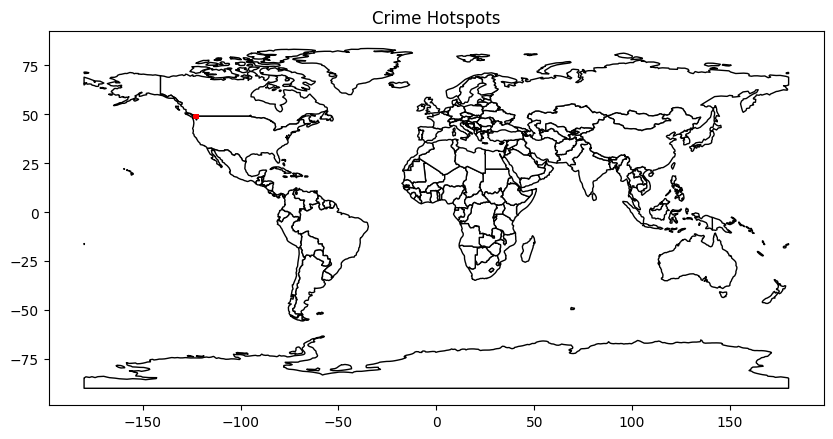

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Crime Hotspots')
plt.show()